## Assembly times  THM vs TRM fully saturated _FE-Model_, first 5 timesteps

In [1]:
from ogs6py.ogs import OGS

In [8]:
import matplotlib.pyplot as plt

In [2]:
m = OGS()

PROJECT_FILE not given. Calling it default.prj.


In [5]:
models=["THM","TRM"]
runs = 5

In [7]:
log_dfs= {}
for model in models:
    log_dfs[model] = {}
    for i in range(runs):
        log_dfs[model][i] = m.parse_out(logfile=f"run_85_{model}_{i+1}.log", filter="by_time_step")

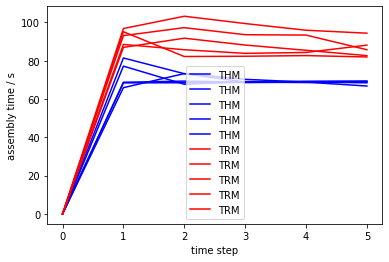

In [30]:
for model in models:
    for i in range(runs):
        if model == "THM":
            plt.plot(log_dfs[model][i]["time_step"], log_dfs[model][i]["assembly_time"], "b-", label=model)
        else:
            plt.plot(log_dfs[model][i]["time_step"], log_dfs[model][i]["assembly_time"], "r-", label=model)
plt.legend()
plt.xlabel("time step")
plt.ylabel("assembly time / s")
plt.show()

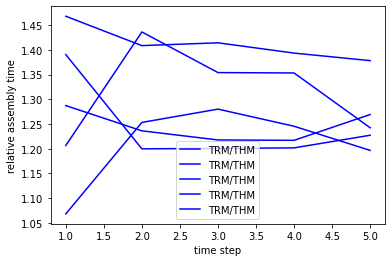

In [31]:
for i in range(runs):
    plt.plot(log_dfs["THM"][i]["time_step"], log_dfs["TRM"][i]["assembly_time"]/log_dfs["THM"][i]["assembly_time"], "b-", label="TRM/THM")
plt.legend()
plt.xlabel("time step")
plt.ylabel("relative assembly time")
plt.show()